# KNN

### K-nearest neighbor 

- 동작 
    - 1. New Data와 모든 Train Set사이의 거리 측정
    - 2. 유클리드 거리가 가까운 순으로 K개의 점을 이웃으로 갖는다.
    - 3. K의개의 점들 중 가장 많이 속한 Class를 찾는다.
    - 4. NewData를 새로운 Class에 할당한다.
    

- K값이 달라질경우 그 근방에 따라 다른 class로 할당된다
- min-max normalization
- z-score standardization 


### 회귀 

- 주변데이터의 평균을 이용해 예측값을 결정
- 데이터 범위 밖의 새로운 데이터는 예측 불가능 

# 최근접 이웃 (K-Nearest Neighbor)

### K란?
- 이웃이나 주변데이터의 개수
- K는 홀수가 좋다.
- K값이 너무 작으면 오버피팅 너무 크면 언더피팅이 날 확률이 높다.
- 기본값을 디폴트로 5로 적용되어있다.

### P_value
- 이웃 선택의 기준이 되는 거리 계산법
- Minkowski 거리법을 사용

### 주의 
- 변수 값 범위 재조정
    - 각 feature의 단위가 다르기 때문에 거리 측정시에 범위를 재조정 해줘야 한다.
    - 물렁도, 크기 단위가 서로 다르기 때문에 같은 거리 측정 방식을 사용하면 안된다. (재조정 필요)

# KNeighborsClassifier() : Classification model
- n_neighbors : int
    - 이웃의 수인 K를 결정한다. default = 5 
- weights : {'uniform', 'distance'} or callable
    - 예측에 사용되는 가중 방법을 결정한다. default는 uniform이다. 
    - 'uniform' : 각각의 이웃이 모두 동일한 가중치를 갖는다. 
    - 'distance' : 거리가 가까울수록 더 높은 가중치를 가져 더 큰 영향을 미치게 된다.
    - callable : 사용자가 직접 정의한 함수를 사용할 수도 있다. 거리가 저장된 배열을 입력으로 받고 가중치가 저장된 배열을 반환하는 함수가 되어야 한다. 
-  algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'} 
    - 가장 가까운 이웃들을 계산하는 데 사용하는 알고리즘을 결정한다. default는 auto이다. 
    - 'auto' : 입력된 훈련 데이터에 기반하여 가장 적절한 알고리즘을 사용한다. 
    - 'ball_tree' : Ball-Tree 구조를 사용한다. (Ball-Tree 설명 : https://nobilitycat.tistory.com/entry/ball-tree)
    - 'kd_tree' : KD-Tree 구조를 사용한다.
    - 'brute' : Brute-Force 탐색을 사용한다. 
- leaf_size : int
    - Ball-Tree나 KD-Tree의 leaf size를 결정한다. default값은 30이다.
    - 이는 트리를 저장하기 위한 메모리뿐만 아니라, 트리의 구성과 쿼리 처리의 속도에도 영향을 미친다. 
- p : int
    - 민코프스키 미터법(Minkowski)의 차수를 결정한다. 예를 들어 p = 1이면 맨해튼 거리(Manhatten distance), p = 2이면 유클리드 거리(Euclidean distance)이다. 

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/tmp/ipykernel_720/2441446269.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import  fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

## K 최근접 이웃 분류 

In [4]:
## 실습 붓꽃 데이터 

iris  = load_iris()


In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
scaler = StandardScaler()
# min-max와 차이점은?
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [9]:
# model 생성 후 학습(scaler 적용전의 Data)
model = KNeighborsClassifier()
model.fit(x_train,y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9666666666666667
Test Data Score: 0.9666666666666667


In [12]:
# model 생성 후 학습(scaler 적용된 Data)
model = KNeighborsClassifier()
model.fit(x_train_scale,y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.975
Test Data Score: 0.9333333333333333


In [13]:
cross_validate(estimator= KNeighborsClassifier(),
               X=x, y=y, cv=5,
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.0030508 , 0.00122857, 0.00129437, 0.00095296, 0.00121808]),
 'score_time': array([0.0030129 , 0.00213122, 0.00190234, 0.00183892, 0.00765467]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [14]:
cross_validate(estimator= KNeighborsClassifier(),
               X=x_train_scale, y=y_train, cv=5,
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.00088596, 0.00124526, 0.00078988, 0.00053406, 0.00105333]),
 'score_time': array([0.0015471 , 0.00240183, 0.00227404, 0.00158834, 0.00160909]),
 'test_score': array([1.        , 0.83333333, 0.95833333, 1.        , 0.95833333])}

In [15]:
param_grid = [{'n_neighbors':[3,5,7], #k 값 이웃값설정
               'weights': ['uniform','distance'], #가중치 설정 uniform:동일 가중치, distance :거리반비례 가중
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}] # 자동이 아니라 종류별 알고리즘 테스트

In [17]:
gs = GridSearchCV(
    estimator= KNeighborsClassifier(),
    param_grid= param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [18]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [19]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [20]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9800000000000001


In [21]:
gs.fit(x_train_scale ,y_train)
gs.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [22]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9583333333333334


In [23]:
#2차원 차원축소
tsne = TSNE(n_components=2) #유클리드 거리
x_comp = tsne.fit_transform(x)

In [24]:
x_comp.shape

(150, 2)

In [25]:
y.shape

(150,)

In [26]:
iris_comp_df = pd.DataFrame(data=x_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-23.580931,-0.522060,0
1,-26.291704,-1.093696,0
2,-26.193335,0.053057,0
3,-26.638256,-0.321696,0
4,-23.545013,-0.941377,0
...,...,...,...
145,11.363099,-4.289077,2
146,10.691204,-1.015444,2
147,11.097084,-3.357184,2
148,13.195991,-3.724547,2


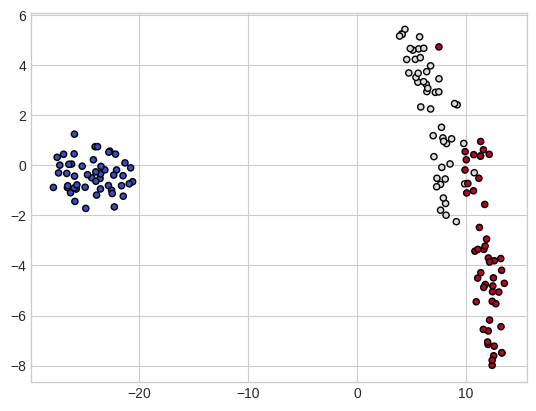

In [27]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y,
            cmap = plt.cm.coolwarm,
            s=20, edgecolors= 'k')

In [28]:
# 2차원 데이터로 학습 
model = KNeighborsClassifier()
model.fit(x_comp,y)
predict = model.predict(x_comp)

In [31]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

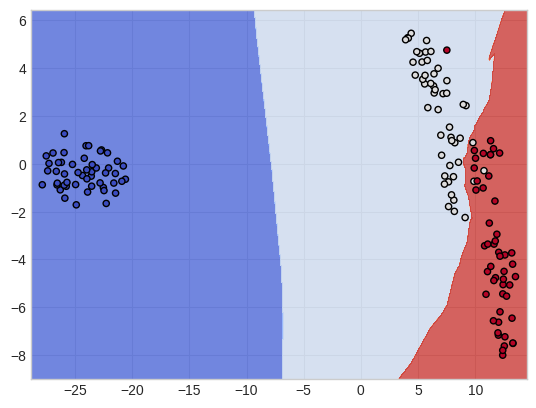

In [32]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
# 데이터 스케일링 -> 모델 생성 후 학습(scale 적용전과 후 ) -> 크로스 벨리데이션 확인 -> 파람 그리드 생성 ->
# 그리드서치 진행 -> 그리드서치모델에 학습
# 2차원 확인 tsne으로 2차배열로 생성 ->데이터 프레임 다시짜고 -> Kne모델 생성후 2차원 배열 학습 ->predict = 이차원

In [33]:
# 유방암 데이터 실습 

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df
x, y =cancer.data, cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [34]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [35]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f"Train Data Score : {model.score(x_train, y_train)}")
print(f"Test Data Score: {model.score(x_test,y_test)}")

Train Data Score : 0.9406593406593406
Test Data Score: 0.9385964912280702


In [36]:
model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)

print(f"Train Data Score : {model.score(x_train_scale, y_train)}")
print(f"Test Data Score: {model.score(x_test_scale,y_test)}")

Train Data Score : 0.9802197802197802
Test Data Score: 0.9736842105263158


In [37]:
cross_validate(estimator = KNeighborsClassifier(),
               X = x , y = y , cv = 5, 
               n_jobs = multiprocessing.cpu_count())

{'fit_time': array([0.00091028, 0.00119352, 0.00080514, 0.0007751 , 0.0005815 ]),
 'score_time': array([0.1569581 , 0.12735915, 0.10981655, 0.08941436, 0.00554514]),
 'test_score': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])}

In [38]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x_train_scale, y=y_train, cv=5, 
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.00065136, 0.0006063 , 0.00058389, 0.00064731, 0.00104117]),
 'score_time': array([0.00294256, 0.00307035, 0.00424123, 0.00335598, 0.00312614]),
 'test_score': array([0.94505495, 0.95604396, 0.93406593, 0.96703297, 0.97802198])}

In [39]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree','kd_tree','brute']}]

In [40]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [41]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [42]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [43]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9297003570874087


In [44]:
gs.fit(x_train_scale, y_train)
gs.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


KNeighborsClassifier(algorithm='ball_tree')

In [45]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.956043956043956


In [46]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(x)

In [47]:
x_comp.shape 

(569, 2)

In [48]:
cancer_comp_df = pd.DataFrame(data = x_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,42.104282,-12.535738,0
1,42.269810,-9.850520,0
2,37.661800,-9.865570,0
3,-17.582714,1.816186,0
4,36.543030,-7.761000,0
...,...,...,...
564,43.790070,-9.225799,0
565,38.597885,-9.270696,0
566,22.164120,-2.738216,0
567,40.147724,-9.924445,0


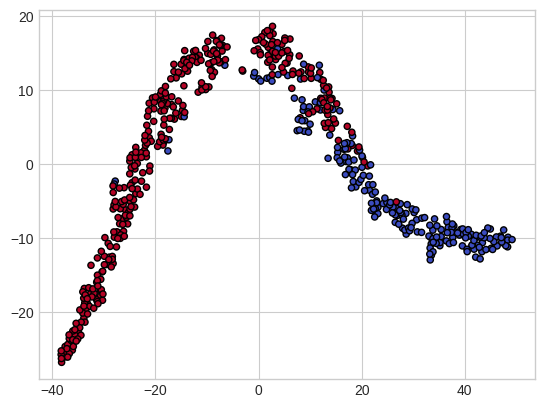

In [49]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [50]:
# 2차원 데이터로 학습
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

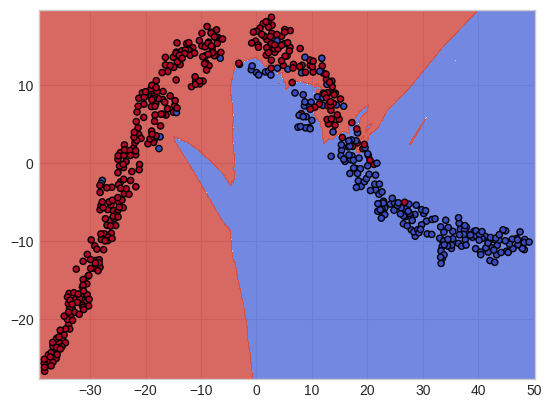

In [51]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [52]:
# 와인 데이터 실습 
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()
x, y = wine.data, wine.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [53]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [54]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f"Train Data Score : {model.score(x_train,y_train)}")
print(f"Test Data Score : {model.score(x_test,y_test)}")

Train Data Score : 0.7816901408450704
Test Data Score : 0.75


In [55]:
model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)

print(f"Train Data Score : {model.score(x_train_scale,y_train)}")
print(f"Test Data Score : {model.score(x_test_scale,y_test)}")

Train Data Score : 0.9788732394366197
Test Data Score : 0.9722222222222222


In [80]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [81]:
cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs =multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00156498, 0.00129104, 0.00337052, 0.00371361, 0.00121856]),
 'score_time': array([0.00264215, 0.00197554, 0.00331354, 0.0022912 , 0.0017345 ]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [82]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

In [83]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [84]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,    
    verbose=True,
    # n_jobs=multiprocessing.cpu_count()
)

In [85]:
gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [86]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9665079365079364


In [87]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [56]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.00175834, 0.00105023, 0.00109243, 0.00103521, 0.00080442]),
 'score_time': array([0.00303197, 0.00213003, 0.00206566, 0.00199032, 0.00170994]),
 'test_score': array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857])}

In [57]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x_train_scale, y=y_train, cv=5, 
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.00079107, 0.00072241, 0.00070572, 0.00076175, 0.00070643]),
 'score_time': array([0.0036869 , 0.00405502, 0.00518465, 0.00218821, 0.00169444]),
 'test_score': array([0.96551724, 0.93103448, 0.92857143, 1.        , 0.96428571])}

In [58]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [59]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [60]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

In [61]:
print(f"GridSearchCV best score : {gs.best_score_}")

GridSearchCV best score : 0.7250793650793651


In [62]:
gs.fit(x_train_scale, y_train)
gs.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [63]:
print(f"GridSearchCV best score : {gs.best_score_}")

GridSearchCV best score : 0.9647783251231526


In [95]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(x)

In [96]:
wine_comp_df = pd.DataFrame(x_comp)
wine_comp_df['target'] = y
wine_comp_df.head()

,0,1,target
0,10.776262,-0.487612,0
1,10.432003,-0.650546,0
2,12.985907,-0.837710,0
3,15.823071,-0.589132,0
4,2.084576,-0.622652,0


In [94]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

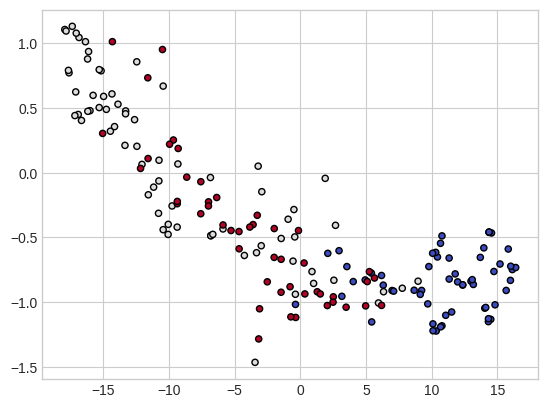

In [97]:
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [100]:
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

In [ ]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, s=20, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### K 최근접 이웃 회귀
- 주변 데이터의 평균을 이용해 예측값을 결정
- 데이터 범위 밖의 새로운 데이터는 예측 불가능

In [102]:
# 실습 캘리포니아 주택 가격 데이터

In [103]:
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [104]:
x, y = california.data, california.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [105]:
california_train_df = pd.DataFrame(x_train, columns = california.feature_names)
california_train_df['Target'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,1.1705,32.0,4.792291,1.008565,1292.0,2.766595,33.91,-118.27,1.106
1,2.3382,38.0,5.142857,1.160714,478.0,4.267857,37.29,-120.32,0.596
2,2.9423,42.0,2.680108,1.005376,982.0,2.639785,34.08,-118.28,2.000
3,4.3008,33.0,6.314159,1.081858,1109.0,2.453540,38.02,-121.33,1.364
4,4.0526,36.0,5.639506,1.096296,1425.0,3.518519,33.95,-117.43,1.045
...,...,...,...,...,...,...,...,...,...
16507,5.1520,35.0,5.571429,0.968944,479.0,2.975155,33.81,-117.98,2.156
16508,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
16509,1.4552,52.0,1.902087,1.059390,1007.0,1.616372,37.79,-122.40,4.500
16510,2.6154,31.0,3.613924,0.968354,841.0,5.322785,33.91,-118.22,0.892


In [106]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [107]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)
print(f"Train Data Score : {model.score(x_train,y_train)}")
print(f"Test Data Score : {model.score(x_test,y_test)}")

Train Data Score : 0.45134363316970183
Test Data Score : 0.15667757961235274


In [108]:
model = KNeighborsRegressor()
model.fit(x_train_scale, y_train)
print(f"Train Data Score : {model.score(x_train_scale,y_train)}")
print(f"Test Data Score : {model.score(x_test_scale,y_test)}")

Train Data Score : 0.7927478497330939
Test Data Score : 0.6822143403156793


In [109]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [110]:
cross_validate(
    estimator = estimator, 
    X=x, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True 
)    

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.9s finished


{'fit_time': array([0.03211761, 0.0430944 , 0.06154108, 0.03303623, 0.02397799]),
 'score_time': array([0.53177643, 0.50767708, 0.51472282, 0.56798148, 0.48998356]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [111]:
cross_validate(
    estimator = estimator, 
    X=x_train_scale, y=y_train,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True 
)     

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.02011085, 0.01913905, 0.02493453, 0.03202462, 0.01905823]),
 'score_time': array([0.46474767, 0.45100641, 0.38750315, 0.50585961, 0.3987186 ]),
 'test_score': array([0.68538188, 0.67987625, 0.6925058 , 0.67865389, 0.66629119])}

In [112]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [113]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [114]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [115]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=4,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [116]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='brute', n_neighbors=7,
                                     weights='distance'))])

In [117]:
print(f"GridSearchCV best score : {gs.best_score_}")

GridSearchCV best score : 0.5376515274379834


In [118]:
gs.fit(x_train_scale,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=4,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [119]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [120]:
print(f"GridSearchCV best score : {gs.best_score_}")

GridSearchCV best score : 0.6910989838453532


In [121]:
tsne = TSNE(n_components=1)
x_comp = tsne.fit_transform(x)

In [122]:
california_comp_df = pd.DataFrame(data=x_comp)
california_comp_df['target']=y
california_comp_df.head()

,0,target
0,-116.784935,4.526
1,89.223648,3.585
2,-98.744530,3.521
3,-90.634514,3.413
4,-89.940598,3.422


/tmp/ipykernel_720/2540627321.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')


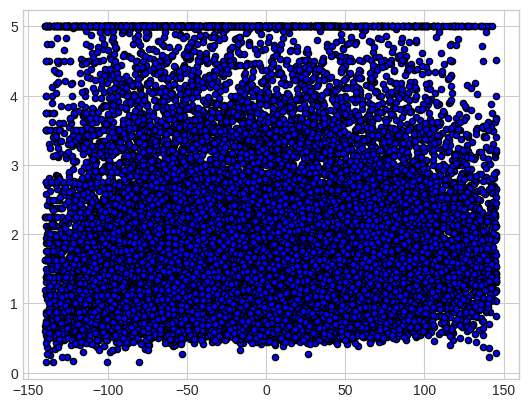

In [123]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [124]:
model = gs.best_estimator_
model.fit(x_comp,y)
predict = model.predict(x_comp)

/tmp/ipykernel_720/459191410.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
/tmp/ipykernel_720/459191410.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')


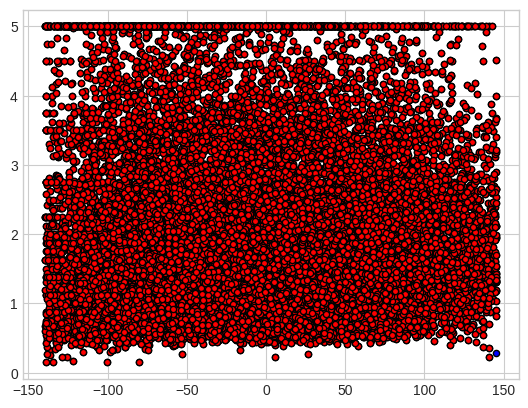

In [125]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(x_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 최적 k값 찾기 

In [126]:
iris = load_iris()
x,y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [129]:
model =KNeighborsRegressor()
model.fit(x_train, y_train)

print(f'scale 전 Train Data Score: {model.score(x_train, y_train)}')
print(f'scale 전 Test Data Score: {model.score(x_test, y_test)}')

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

model =KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print(f'scale 후 Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'scale 후 Test Data Score: {model.score(x_test_scale, y_test)}')

scale 전 Train Data Score: 0.9725273621849583
scale 전 Test Data Score: 0.9387033398821218
scale 후 Train Data Score: 0.9537302942062456
scale 후 Test Data Score: 0.9363457760314342


Text(0, 0.5, 'test score(accuracy)')

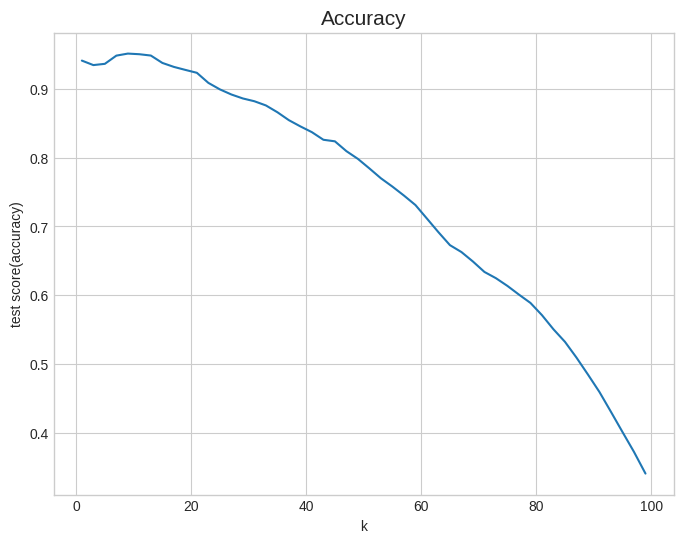

In [130]:
k_list = range(1,101, 2)
accuracies = []

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_scale, y_train)
    accuracies.append(model.score(x_test_scale, y_test))
    
plt.figure(figsize=(8,6))    
plt.plot(k_list, accuracies)
plt.title('Accuracy', fontsize=15)
plt.xlabel('k')
plt.ylabel('test score(accuracy)')

In [131]:
df = pd.DataFrame(k_list, accuracies).reset_index()
df.columns = ['accuracy', 'k']
df.sort_values(by='accuracy', ascending=False)
# k가 몇에서 정확도가 높은지 확인가능하다!

,accuracy,k
4,0.951248,9
5,0.950316,11
6,0.948385,13
3,0.948278,7
0,0.941061,1
7,0.937656,15
2,0.936346,5
1,0.934512,3
8,0.931884,17
9,0.927510,19


# 디시전 트리 (Decision Tree)

- 분류 , 회귀 , 다중출력 작업이 가능한 머신러닝 알고리즘
- 데이터에 내제되어 있는 패턴을 변수 조합으로 나타내는 예측/분류 모델을 나무의 형태로 만드는것 
- 질문을 던져서 맞고 틀리는 것에 따라 우리가 생각하고 있는 대상을 좁혀나간다.


### 이진분할
- 이진분할 문제는 무언가를 균등하게 나누는것이 목표이다.
- 새로운 모델 -> 분류가능해야함
- 5개의 부분집합으로 분류된다.
- 분할의 갯수 = 끝마디의 갯수 

### Impurity
- Cost Function
    - 일반적인 모델에서의 Cost Function은 매우 간단하고 직관적
    - 차이를 나타내는 cost Fucntion은 분류모델에서 의미가 없다.

- Impurity 추정(분류 모델에서의 Costfunction)
    - 분류 모델에서의 Cost Function은 직관적이지는 않다.
    - 범주형 데이터이기 때문
        - 성공 or 실패
        - 사과 배, 포도
- purity 
    - 서로 다른 Target Data가 섞이지 않게 해야 한다.
    - Decision Tree의 결과는 Pure한 상황이어야 한다.
    - 서로 다른 Target Data가 섞여 있다면 Impurity가 높다 라고 한다.
- Goal
    - Impurity를 작게 -> 최대한 pure한 상황
    - Impurity Function을 이용해 측정할 수 있다.
- Impurity Function
    - Entropy
    - Gini Impurity
    - Missclassification Error
- Entropy vs Gini
    - 실제로는 큰 차이가 없이 둘다 비슷한 트리를 만듦
    - 지니가 더 계산이 빠르기때문에 기본값으로 좋다 
    - 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이
    있는 반면 엔트로피는 조금 더 균형 잡힌 트리를 만듦



### 트리 설명
- 노드의 sample 속성은 많은 훈련 샘플이 적용된지 헤아린 것
- 노드의 gini 속성은 불순도(impurity)를 측정.


- Leaf(terminal node)에는 규칙 조건이 존재하지 않는다.
- gini : 한 노드의 모든 샘플이 같은 클래스에 속하면 이 노드를 순수(gini=0)하다고 표현.
- sample : 현재 조건에 해당하는 data의 수
- value : 각 class에 해당하는 data수 
- calss : value 내에 가장 많은 data를 가진 결정값

### 주요 파라미터

- Max_depth
    - 트리의 최대 깊이
    - 디폴트 설정은 완전히 Class를 나눌때까지 depth를 키우며 분할
    - 깊이가 깊어질수록 overfitting된다.
- Max_features
    - 최적의 분할을 위해 고려할 Feature의 개수
    - 디폴트는 모든 Feature을 고려하여 분할 수행
    - sqrt,auto : 루트 피처의 개수만큼 피처 설정
    - log : log2전체 피처
- Min_samples_split
    - node분할을 위한 최소 sample data 개수
    - overfitting 문제 해결을 위해 사용
- Min_samples_leaf
    - Leaf 가 되기위한 최소한의 sample data수
    - overfitting 문제 해결을 위해 사용
- Max_leaf_nodes
    - leaf의 최대 개수 
    

In [132]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import  load_diabetes
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# 결정 트리 

In [133]:
# 분류 데이터
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
# iris_df
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
# wine_df
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
# cancer_df
# Regression 데이터
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
# diabetes_df

### 분류 - DecisionTreeClassifier()

- DecisionTreeClassifier는 분류를 위한 결정트리 모델
- 두개의 배열 x,y를 입력 받음
    - x는 [n_samples, n_features]크기의 데이터 특성배열
    - y는 [n_sampels]크기의 정답 배열

In [134]:
x = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [135]:
model.predict([[2., 2.]])

array([1])

In [136]:
model.predict_proba([[2., 2.]])

array([[0., 1.]])

In [137]:
r = tree.export_text(decision_tree=model,
                     feature_names=["X_1", "X_2"])
print(r)

|--- X_1 <= 0.50
|   |--- class: 0
|--- X_1 >  0.50
|   |--- class: 1



[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

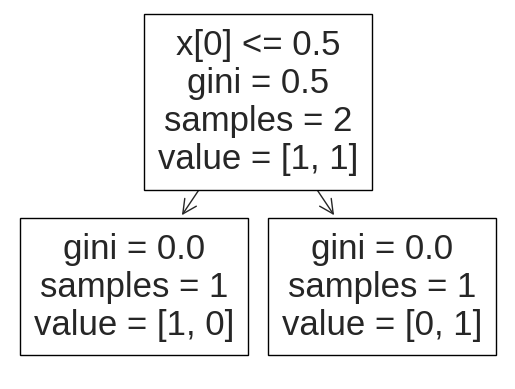

In [138]:
tree.plot_tree(model)

### 붓꽃 데이터 학습
교차검증
Standard Scaler를 통해 전처리 여부에 영향을 받는지 확인


In [139]:
# 전처리 없이 학습 
model = tree.DecisionTreeClassifier()

In [140]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y= iris.target,
                n_jobs=multiprocessing.cpu_count())

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [141]:
# 전처리 후 학습 
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier()
)

In [142]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y= iris.target,
                n_jobs=multiprocessing.cpu_count())

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [ ]:
# 결정트리는 규칙을 학습하기 때문에 전처리에 큰 영향이 없다.


In [143]:
# 학습된 결정트리 시각화
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [144]:
r =tree.export_text(decision_tree=model,
                    feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

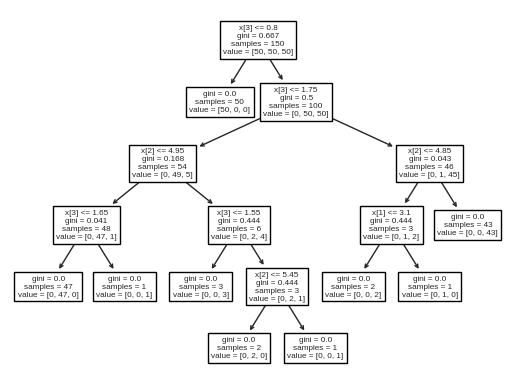

In [145]:
tree.plot_tree(model)

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model, # 디시전 모델 
                                feature_names = iris.feature_names, # 피처네임
                                class_names = iris.target_names, # 클래스 네임
                                filled = True, rounded = True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [149]:
#시각화 
n_classes = 3 
plot_colors = 'ryb' #red yellow blue
plot_step=.02

In [147]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/tmp/ipykernel_720/900767965.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


/tmp/ipykernel_720/3111928573.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
/tmp/ipykernel_720/3111928573.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
/tmp/ipykernel_720/3111928573.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
/tmp/ipykernel_720/3111928573.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
/tmp/ipykernel_720/3111928573.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_

(0.0, 7.88, -0.9, 3.4800000000000044)

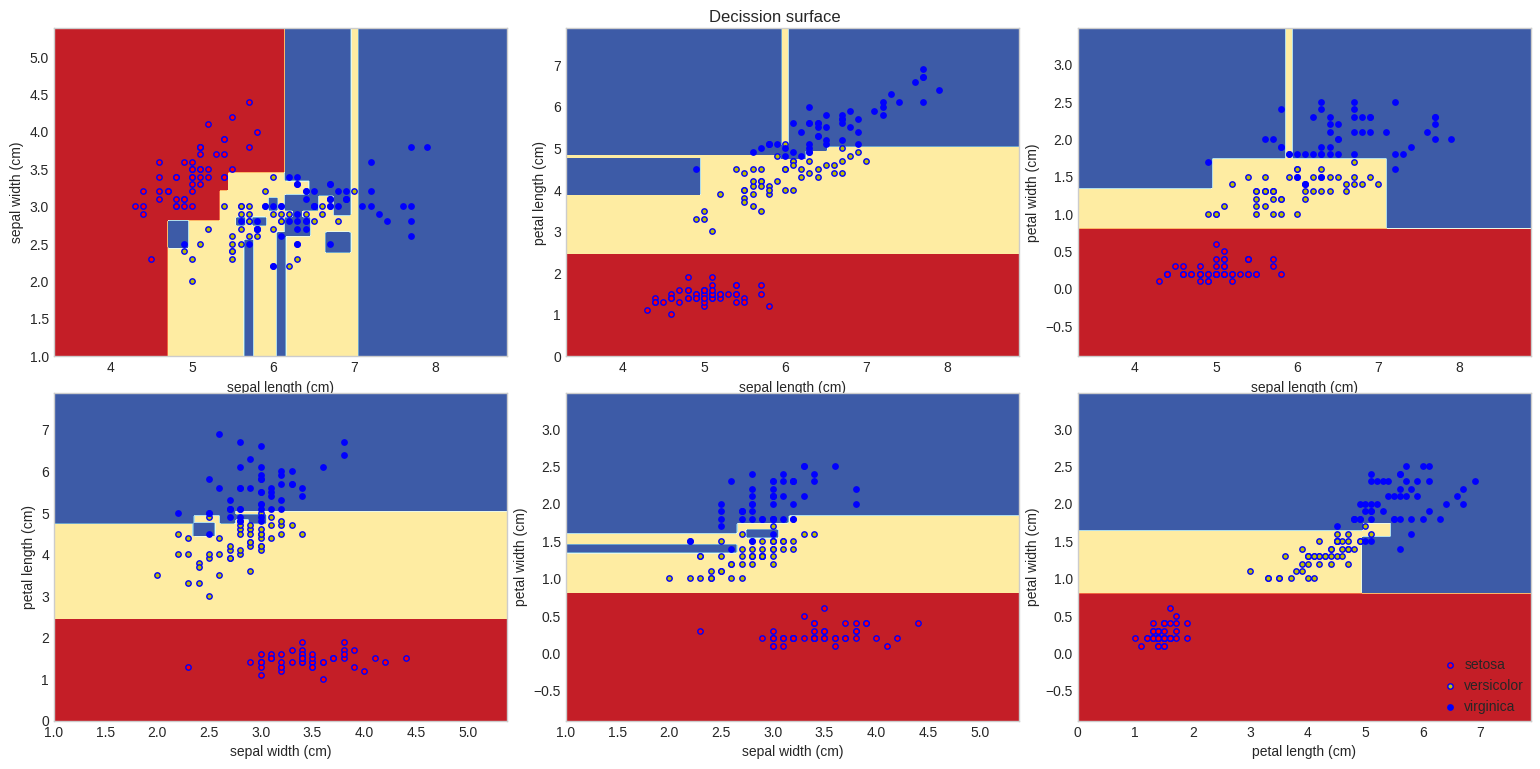

In [150]:
# 결정 경계 시각화 
plt.figure(figsize=(16,8)) 

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

In [ ]:
# 순서 모델(전처리 없이)학습 -> 학습된 결정트리 시각화 -> 
#텍스트 시각화,plot_tree시각화,graphviz시각화,결정경계 시각화, 결정경계 max_depth변화 확인